   SalePrice  LotArea  Bedrooms  Bathrooms Neighborhood  YearBuilt  \
0  444779.85    22452         1   1.100043     Downtown       1951   
1  266432.37    23674         6   4.568718      SuburbA       1995   
2  452819.42     4570         2   1.930644      SuburbA       1991   
3  126971.70     8723         4   3.357063      SuburbA       2017   
4  467272.51    12649         3   1.621918     Downtown       1933   

   GarageArea  OverallQual HeatingType  
0         328            3         Gas  
1         532            1         Gas  
2         303            9        Wood  
3         925            3        Wood  
4         194            7         Gas  
Summary Statistics:
           SalePrice       LotArea     Bedrooms    Bathrooms    YearBuilt  \
count    1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean   322214.216550  13321.734000     3.640000     3.009127  1972.761000   
std    162185.565024   6684.791449     1.692118     1.165516    30.096506   
min  

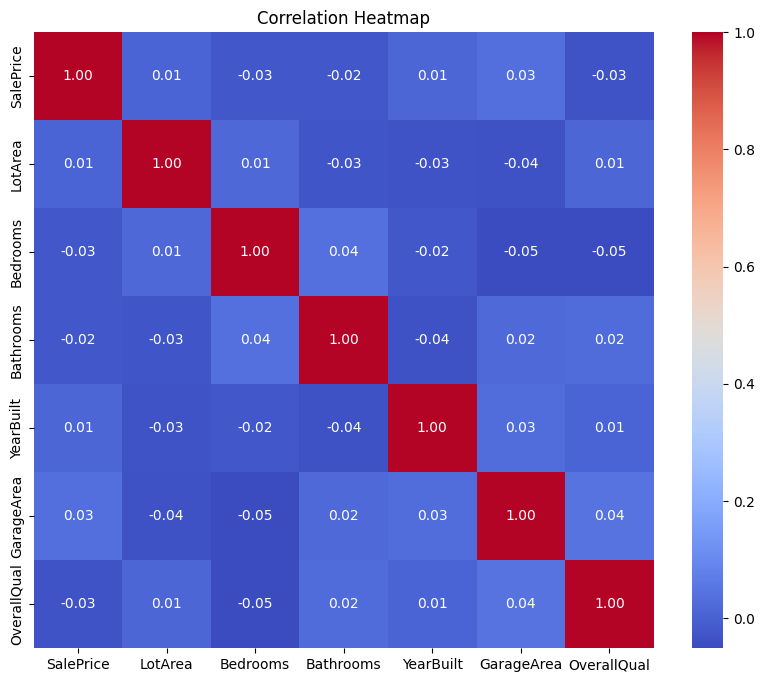

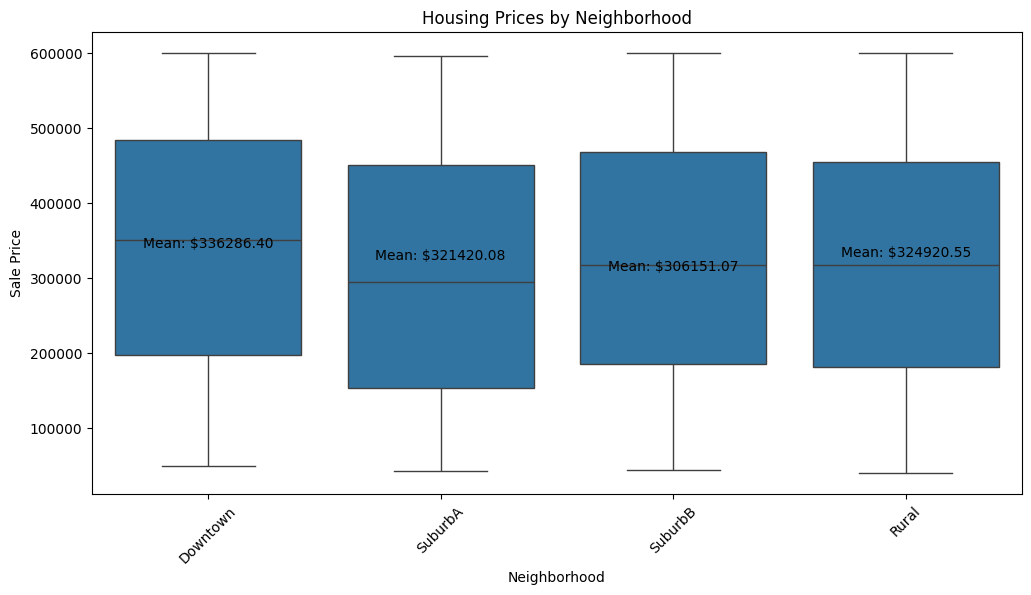

ANOVA Table:
                    sum_sq     df         F    PR(>F)
Neighborhood  1.170017e+11    3.0  1.484835  0.217085
Residual      2.616085e+13  996.0       NaN       NaN


In [14]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import housing price dataset
data = pd.read_csv('housing.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=[int, float])

# Calculate the means for each neighborhood
neighborhood_means = data.groupby('Neighborhood')['SalePrice'].mean().reset_index()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the beginning of the data
print(data.head())

# Compute summary statistics for numerical variables
summary_stats = data.describe()

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Create box plots to visualize price distribution by neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Housing Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add mean values to the box plots
for i, mean_price in enumerate(neighborhood_means['SalePrice']):
    plt.text(i, mean_price, f'Mean: ${mean_price:.2f}', ha='center', va='bottom')

plt.show()

# Perform ANOVA to test for differences in housing prices among neighborhoods
model = ols('SalePrice ~ Neighborhood', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("ANOVA Table:")
print(anova_table)

Interpretation: 
    ANOVA table suggests that there is no statistically significant difference in housing prices among different neighborhoods. Based on the p-value (PR(>F)) of 0.217, which is greater than the conventional significance level of 0.05

Summary:
    The analysis indicates that neighborhood differrence do not account for statistically significant amount of variation in housing prices. Other factors, not included in the analysis, may have more substantial influence on sale prices.

Insight:
    While Anova did not find significant differences in housing among neighborhoods, it is essential to consider various factor.
    Also, we could use this as an example of how a housing price EDA works, however we could collect a real dataset to see if there is a statically significant difference between neighborhood and sales prices.
    Additional research and data exploration are warranted to gain more comprehensive understanding of the determinants of house prices.
    